##### Problem Statement :Perform Exploratory Data Analysis on DC Crime to draw insights for model training
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##### 1. Data Ingestion & Data Preparation

In [ ]:
df = pd.read_csv('dc_crime_nov_2024.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14369 entries, 0 to 14368
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     14369 non-null  float64
 1   Y                     14369 non-null  float64
 2   CCN                   14369 non-null  int64  
 3   REPORT_DAT            14369 non-null  object 
 4   SHIFT                 14369 non-null  object 
 5   METHOD                14369 non-null  object 
 6   OFFENSE               14369 non-null  object 
 7   BLOCK                 14369 non-null  object 
 8   XBLOCK                14369 non-null  float64
 9   YBLOCK                14369 non-null  float64
 10  WARD                  14367 non-null  float64
 11  ANC                   14367 non-null  object 
 12  DISTRICT              14130 non-null  float64
 13  PSA                   14118 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  14367 non-null  object 
 15  BLOCK_GROUP        

In [3]:
df.shape

(14369, 25)

In [4]:
df.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-76.987814,38.888823,24058468,2024/04/19 08:48:36+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,1300 - 1332 BLOCK OF MASSACHUSETTS AVENUE SE,401057.46000,135663.730000,...,006700 1,6700.0,Precinct 88,38.888815,-76.987811,NaN,2024/04/19 07:37:00+00,2024/04/19 08:15:00+00,553684053,NaN
1,-77.066073,38.905542,24058885,2024/04/20 09:09:24+00,MIDNIGHT,KNIFE,ROBBERY,1200 - 1227 BLOCK OF 33RD STREET NW,394269.23000,137521.710000,...,000202 3,202.0,Precinct 6,38.905534,-77.066071,GEORGETOWN,2024/04/20 02:06:00+00,2024/04/20 03:41:00+00,553684054,NaN
2,-76.941883,38.902526,24097356,2024/06/26 17:29:51+00,DAY,OTHERS,MOTOR VEHICLE THEFT,4250 - 4299 BLOCK OF MINNESOTA AVENUE NE,405041.35000,137186.490000,...,007809 2,7809.0,Precinct 94,38.902519,-76.941880,NaN,2024/06/26 12:05:00+00,2024/06/26 12:40:00+00,553684585,NaN
3,-76.971909,38.847790,24015650,2024/01/31 22:53:15+00,EVENING,GUN,ROBBERY,2200 - 2299 BLOCK OF SAVANNAH STREET SE,402438.66448,131109.085399,...,007409 2,7409.0,Precinct 116,38.847782,-76.971907,NaN,2024/01/31 03:40:00+00,2024/01/31 04:00:00+00,553684640,NaN
4,-76.972036,38.863898,24017491,2024/02/04 01:13:07+00,EVENING,OTHERS,BURGLARY,2300 - 2399 BLOCK OF ALTAMONT PLACE SE,402427.16320,132897.247097,...,007605 4,7605.0,Precinct 134,38.863891,-76.972033,NaN,2024/02/03 23:06:00+00,2024/02/04 01:13:00+00,553684641,NaN


In [5]:
df.tail()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
14364,-77.027952,38.961987,24105388,2024/07/10 09:58:04+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,5900 - 5999 BLOCK OF GEORGIA AVENUE NW,397577.63,143785.94,...,001901 1,1901.0,Precinct 58,38.961980,-77.027950,NaN,2024/07/10 01:33:00+00,2024/07/10 03:06:00+00,554231786,NaN
14365,-76.965607,38.851270,24105765,2024/07/10 21:35:01+00,EVENING,OTHERS,MOTOR VEHICLE THEFT,3029 - 3299 BLOCK OF BUENA VISTA TERRACE SE,402985.66,131495.55,...,007502 3,7502.0,Precinct 115,38.851262,-76.965604,NaN,2024/07/10 21:14:00+00,2024/07/10 21:33:00+00,554231788,NaN
14366,-77.026308,38.929320,24105624,2024/07/10 16:35:47+00,DAY,OTHERS,THEFT F/AUTO,3100 - 3199 BLOCK OF SHERMAN AVENUE NW,397719.10,140159.55,...,003100 1,3100.0,Precinct 38,38.929312,-77.026305,NaN,2024/07/10 16:00:00+00,2024/07/10 16:16:00+00,554231789,NaN
14367,-76.935600,38.879192,24105864,2024/07/11 03:08:34+00,MIDNIGHT,OTHERS,THEFT F/AUTO,717 - 797 BLOCK OF 46TH STREET SE,405588.10,134596.52,...,007707 2,7707.0,Precinct 106,38.879184,-76.935598,NaN,2024/07/11 00:12:00+00,2024/07/11 00:21:00+00,554231790,NaN
14368,-76.976248,38.884085,24035150,2024/03/08 01:12:37+00,EVENING,OTHERS,THEFT F/AUTO,1900 BLOCK OF D STREET SE,402061.00,135138.00,...,006804 1,6804.0,Precinct 80,38.884077,-76.976246,NaN,2024/03/06 13:00:00+00,2024/03/06 16:00:00+00,554231791,NaN


In [6]:
df.columns

Index(['X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK',
       'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA',
       'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID', 'OCTO_RECORD_ID'],
      dtype='object')

##### 2. Data Cleaning

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.columns

Index(['x', 'y', 'ccn', 'report_dat', 'shift', 'method', 'offense', 'block',
       'xblock', 'yblock', 'ward', 'anc', 'district', 'psa',
       'neighborhood_cluster', 'block_group', 'census_tract',
       'voting_precinct', 'latitude', 'longitude', 'bid', 'start_date',
       'end_date', 'objectid', 'octo_record_id'],
      dtype='object')

In [9]:
categorical = list(df.select_dtypes(include='O').columns)
numerical = list(df.select_dtypes(exclude='O').columns)

In [10]:
df[categorical].columns

Index(['report_dat', 'shift', 'method', 'offense', 'block', 'anc',
       'neighborhood_cluster', 'block_group', 'voting_precinct', 'bid',
       'start_date', 'end_date'],
      dtype='object')

In [11]:
df[numerical].columns

Index(['x', 'y', 'ccn', 'xblock', 'yblock', 'ward', 'district', 'psa',
       'census_tract', 'latitude', 'longitude', 'objectid', 'octo_record_id'],
      dtype='object')

In [12]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
x,14369.0,-7.700707e+01,0.034677,-7.711116e+01,-7.703122e+01,-7.700907e+01,-7.698471e+01,-7.691001e+01
y,14369.0,3.890791e+01,0.030399,3.881923e+01,3.889336e+01,3.890851e+01,3.892599e+01,3.899422e+01
ccn,14369.0,2.407610e+07,113425.979981,2.016018e+07,2.402637e+07,2.405759e+07,2.408593e+07,2.503097e+07
xblock,14369.0,3.993875e+05,3007.565453,3.903622e+05,3.972938e+05,3.992136e+05,4.013270e+05,4.078068e+05
yblock,14369.0,1.377836e+05,3374.635669,1.279385e+05,1.361684e+05,1.378496e+05,1.397902e+05,1.473650e+05
ward,14367.0,4.462588e+00,2.304709,1.000000e+00,2.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00
district,14130.0,3.761500e+00,1.843365,1.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00
psa,14118.0,3.807653e+02,183.991266,1.010000e+02,2.080000e+02,4.020000e+02,5.060000e+02,7.080000e+02
census_tract,14361.0,7.924151e+03,39061.856238,1.010000e+02,3.600000e+03,7.304000e+03,9.102000e+03,9.800000e+05
latitude,14369.0,3.890791e+01,0.030399,3.881922e+01,3.889335e+01,3.890850e+01,3.892598e+01,3.899422e+01


In [13]:
df.isnull().sum()

x                           0
y                           0
ccn                         0
report_dat                  0
shift                       0
method                      0
offense                     0
block                       0
xblock                      0
yblock                      0
ward                        2
anc                         2
district                  239
psa                       251
neighborhood_cluster        2
block_group                 8
census_tract                8
voting_precinct             2
latitude                    0
longitude                   0
bid                     11777
start_date                  3
end_date                 1087
objectid                    0
octo_record_id          14369
dtype: int64

#### Insight:
###### Features with large quantity of null values will be dropped
###### For categorical features we will fill the null rows with mode or empty string

In [14]:
df[numerical].isnull().sum()

x                     0
y                     0
ccn                   0
xblock                0
yblock                0
ward                  2
district            239
psa                 251
census_tract          8
latitude              0
longitude             0
objectid              0
octo_record_id    14369
dtype: int64

##### Insight:
###### 'ward','district','psa' and 'census_tract' null values will be filled with median values
###### due to high volume of null values for 'octo_record_id' the feature will be dropped 

In [15]:
for col in ['ward','district','psa','census_tract']:
    df[col].fillna(df[col].median(), inplace=True)

In [16]:
# drop the 'octo_recod_id'
df.drop(columns='octo_record_id', inplace=True)

In [17]:
df.shape

(14369, 24)

In [18]:
df[categorical].isnull().sum()

report_dat                  0
shift                       0
method                      0
offense                     0
block                       0
anc                         2
neighborhood_cluster        2
block_group                 8
voting_precinct             2
bid                     11777
start_date                  3
end_date                 1087
dtype: int64

##### Insight:
###### For the following features 'anc','neighborhood_cluster','block_group','voting_precinct', I will replace the null values with the mode of each feature
###### Since 'bid' has large number of missing values, it will be dropped
###### missing values of'start_date' and 'end_date' will be filled by the corresponding reported_date features

In [19]:
for col in ['anc','neighborhood_cluster','block_group','voting_precinct']:
    df[col].fillna(value=df[col].mode()[0], inplace=True)

In [20]:
df.isnull().sum()

x                           0
y                           0
ccn                         0
report_dat                  0
shift                       0
method                      0
offense                     0
block                       0
xblock                      0
yblock                      0
ward                        0
anc                         0
district                    0
psa                         0
neighborhood_cluster        0
block_group                 0
census_tract                0
voting_precinct             0
latitude                    0
longitude                   0
bid                     11777
start_date                  3
end_date                 1087
objectid                    0
dtype: int64

In [21]:
# drop the bid feature
df.drop(columns='bid', inplace=True)

In [22]:
df.shape

(14369, 23)

In [23]:
df.start_date.value_counts()

start_date
2024/05/10 17:00:00+00    6
2024/06/09 04:00:00+00    5
2024/02/20 14:00:00+00    5
2024/04/29 04:00:00+00    5
2024/03/06 04:00:00+00    5
                         ..
2024/01/09 05:32:00+00    1
2024/01/06 21:46:00+00    1
2024/03/05 01:07:00+00    1
2024/03/06 04:15:00+00    1
2024/03/06 13:00:00+00    1
Name: count, Length: 12999, dtype: int64

In [24]:
df[df['start_date'].isnull()]

,x,y,ccn,report_dat,shift,method,offense,block,xblock,yblock,...,psa,neighborhood_cluster,block_group,census_tract,voting_precinct,latitude,longitude,start_date,end_date,objectid
971,-77.029679,38.920507,24014779,2024/01/30 05:34:53+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,13TH STREET NW AND FLORIDA AVENUE NW,397426.470012,139181.255295,...,304.0,Cluster 2,003600 1,3600.0,Precinct 23,38.920499,-77.029677,NaN,NaN,553990148
6449,-77.070024,38.955370,24089639,2024/06/13 03:01:05+00,MIDNIGHT,OTHERS,THEFT F/AUTO,5000 - 5099 BLOCK OF CONNECTICUT AVENUE NW,393930.750000,143053.270000,...,203.0,Cluster 10,001402 3,1402.0,Precinct 138,38.955362,-77.070022,NaN,NaN,554030872
10285,-76.981245,38.864261,24021001,2024/02/10 07:51:29+00,MIDNIGHT,OTHERS,ASSAULT W/DANGEROUS WEAPON,1600 - 1699 BLOCK OF V STREET SE,401627.936959,132937.326937,...,701.0,Cluster 28,007504 2,7504.0,Precinct 114,38.864253,-76.981242,NaN,NaN,554192716


In [25]:
df.shape

(14369, 23)

In [26]:
# fill the null value with corresponding report_dat value
df['start_date'].fillna(value=df['report_dat'], inplace=True)

In [27]:
df.start_date.isnull().sum()

0

In [28]:
# fill the null values with corresponding start_date values
df['end_date'].fillna(value=df['start_date'], inplace=True)

In [29]:
df.end_date.isnull().sum()

0

In [30]:
df.isnull().sum()

x                       0
y                       0
ccn                     0
report_dat              0
shift                   0
method                  0
offense                 0
block                   0
xblock                  0
yblock                  0
ward                    0
anc                     0
district                0
psa                     0
neighborhood_cluster    0
block_group             0
census_tract            0
voting_precinct         0
latitude                0
longitude               0
start_date              0
end_date                0
objectid                0
dtype: int64

##### 3. EDA

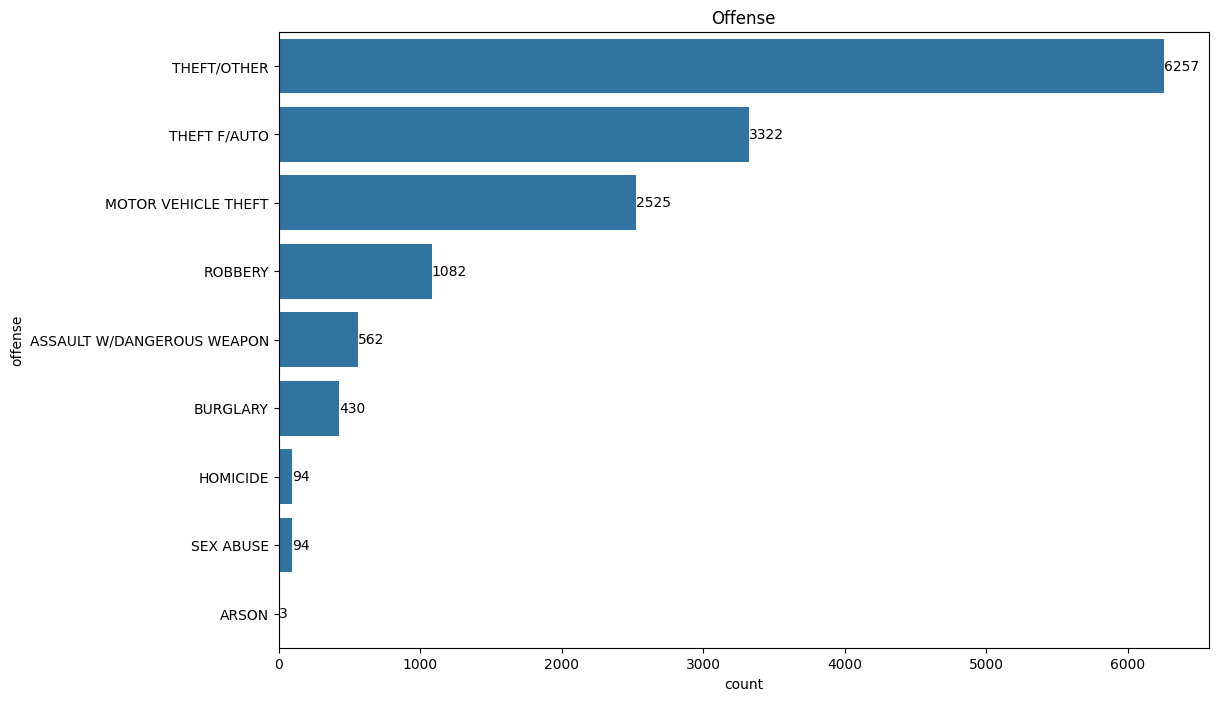

In [31]:
plt.figure(figsize=(12,8))
plt.title("Offense")
ax = sns.countplot(data = df, y='offense',
              order = df['offense'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)